<a href="https://colab.research.google.com/github/ernanhughes/youtube-videos/blob/main/Text_to_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Steps for generating video from text

1. Use openai to generate a video script from a topic
2. Use edgetts to pick a voice and create a audio based on the above generated script
3. Use whisper and get timed captions for the above audio
4. Now generate visual keywords for the video script using openai api
5. Fetch videos based on the above visual keywords using pexels api
6. Stich together the videos, audio and captions using Moviepy

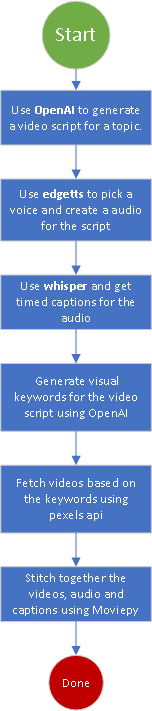

### Install python 3.11

In [ ]:
!sudo apt-get update -y
!sudo apt-get install -y python3.11
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.11 1
!sudo update-alternatives --config python3
!sudo apt-get install -y python3.11-distutils
!wget https://bootstrap.pypa.io/get-pip.py
!python3.11 get-pip.py

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 257 kB in 2s (133 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package list

In [ ]:
!git clone https://github.com/SamurAIGPT/Text-To-Video-AI

fatal: destination path 'Text-To-Video-AI' already exists and is not an empty directory.


In [ ]:
%cd Text-To-Video-AI

/content/Text-To-Video-AI/Text-To-Video-AI


### Install dependencies

In [ ]:
!pip3.11 install -r requirements.txt

### Setup api keys

In [ ]:
import os

#for text generation, use openai or groq. groq model used: "llama3-70b-8192"
#note: use just one
from google.colab import userdata

os.environ["OPENAI_KEY"] = userdata.get('OPENAI_KEY')
os.environ['GROQ_API_KEY'] = userdata.get('GROQ_API_KEY')

os.environ["PEXELS_KEY"] = userdata.get('PEXELS_KEY')

In [ ]:
!apt install imagemagick &> /dev/null
!sed -i '/<policy domain="path" rights="none" pattern="@\*"/d' /etc/ImageMagick-6/policy.xml

### Generate video from topic

In [ ]:
!python3.11 app.py "Meditation"

script: Did you know?
- Meditation can physically change your brain, increasing gray matter in areas related to learning, memory, and emotion regulation.
- It can also decrease the density of gray matter in the amygdala, reducing stress and anxiety.
- Regular meditation can even enhance your immune system and improve your focus.
- Some of the world's top performers, like Steve Jobs and Oprah Winfrey, swear by meditation for productivity and mental clarity.
- There are many types of meditation, from mindfulness to transcendental, so anyone can find a method that works for them.
Detected language: English
100% 3422/3422 [00:12<00:00, 268.76frames/s]
[((0, 0.66), 'Did you know'), ((0.66, 2.48), 'Meditation can'), ((2.48, 2.9), 'physically'), ((2.9, 3.44), 'change your'), ((3.44, 3.69), 'brain'), ((3.69, 4.66), 'increasing grey'), ((4.66, 5.2), 'matter in'), ((5.2, 5.92), 'areas related'), ((5.92, 6.44), 'to learning'), ((6.44, 7.28), 'memory and'), ((7.28, 7.6), 'emotion'), ((7.6, 8.12), 

### Display video

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import datetime
import shutil


def add_timestamp_to_filename(filename):
    # Get the current timestamp
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

    # Separate the filename and its extension
    name, ext = filename.rsplit(".", 1)

    # Add the timestamp and reassemble the filename
    new_filename = f"{name}_{timestamp}.{ext}"
    return new_filename

# Path to the video file
original_filename = "rendered_video.mp4"
video_path = add_timestamp_to_filename(original_filename)
print(f"video path: {video_path}")

# Move the file
try:
    shutil.move(original_filename, video_path)
    print(f"File moved from {original_filename} to {video_path}")
except FileNotFoundError:
    print(f"The source file {original_filename} does not exist.")
except Exception as e:
    print(f"An error occurred: {e}")



# Function to display video
def display_video(video_path, width=640, height=480):
    # Load video
    video_file = open(video_path, "rb").read()
    video_url = "data:video/mp4;base64," + b64encode(video_file).decode()
    return HTML(f"""
    <video width={width} height={height} controls>
        <source src="{video_url}" type="video/mp4">
    </video>
    """)

# Display video
display_video(video_path)

video path: rendered_video_20250103_003536.mp4
File moved from rendered_video.mp4 to rendered_video_20250103_003536.mp4
